<a href="https://colab.research.google.com/github/KeyboarderSon/KerasExample/blob/main/MovieReview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 양극단의 영화 리뷰

### IMDB 데이터셋

훈련 데이터, 테스트 데이터 각각 25000개로 나뉘어있고 각각 50%의 긍정, 부정으로 구성되어있다.
<br>88584개의 쌍으로 이루어져있고 자주 나타나는 빈도 순으로 정렬되어있다.
<br>
```num_words=10000``` : 훈련 데이터에서 가장 자주 나타나는 단어 1위부터 10000위까지만 사용하겠다


<br>
그러므로 train_data, test_data 모두 단어가 자주 나타나는 빈도 10000위를 넘어가는 단어는 무시하고 나타내어진다.

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000
)

17465344/17464789 [==============================] - 1s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [2]:
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


```word_index``` : 단어와 정수 인덱스를 매핑한 딕셔너리

|key|value|
|------|---|
|'this'|11|
|'film|19|


In [16]:
word_index=imdb.get_word_index()

print(word_index['this'])
print(word_index['film'])

11
19


In [20]:
print(len(word_index))

88584


{index : 단어} 형태가 되도록 뒤집은 ```reverse_word_index```<br>
```' '.join``` : 리스트를 문자열로<br>
리스트 요소 사이사이에 ' (스페이스바)'를 집어넣는다. 그래서 하나의 문장이 완성된다.<br>
```dict.get(i-3, '?')``` : i-3에 해당하는 key 값이 존재하지 않으면 디폴트인 '?'를 내뱉는다.<br>
i-3을 한 이유는 0, 1, 2는 각각 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이고 3부터 단어가 시작되기 때문에 그렇다. 이는 IMDB 리뷰 데이터셋에서 정한 규칙이다.


아래와 같은 형태가 되도록 revese_word_index

|key|value|
|------|---|
|11|'this'|
|19|'film'|





In [45]:
#정수 인덱스와 단어를 매핑하도록 뒤집는다.
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]])

train_data[0]을 해독해보면,

In [7]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

### 데이터 전처리

**리스트를 텐서로 바꾸는 방법**

* 같은 길이가 되도록 리스트에 padding을 추가하고 (samples, max sequence length)로 변환한다. 여기서는 제일 긴 리뷰는 2494개의 단어로 이루어져 있으므로 변환한 텐서의 크기는 (25000, 2494)가 된다.<br>
이 정수 텐서를 다룰 수 있는 embedding층을 사용한다.
* 리스트를 one-hot encoding 하여 0과 1의 벡터로 변환한다. 시퀀스에 해당되는 index만 1, 나머지는 0인 (25000, 10000)의 형태가 되겠다(25000개의 리뷰, 10000개의 자주쓰이는 단어).<br>
부동 소수 벡터 데이터를 다룰 수 있는 Dense 층을 사용한다.

<br>

여기서는 후자인 one-hot encoding을 이용한 방식을 사용해보겠다.

x_train
[ [리뷰 1],<br>
  [리뷰 2],<br>
 ...<br>
 [리뷰 25000] ]

<br>
인 것이고 각 리뷰마다 자주 쓰는 단어 1위부터 10000위까지의 단어로만 나타내었으니 리뷰 하나당 요소가 10000개인 vector으로 
나타낼 수 있는 것이다.

<br>

단어 인덱스에 해당하는 result index의 값이 1, 나머지는 0이 된다.

<br>

말하자면 이 작업을 통해서 this, film, was ... 와 같은 문장의 단어 순서는 관계 없어지고 각 단어의 존재성 유무만 따지게 된다.

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [23]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


라벨은 각 리뷰에 대하여 긍정 혹은 부정만 뜻하는 것이므로 쉽게 벡터로 바꿀 수 있다.

In [27]:
print(train_labels.shape)

(25000,)


In [28]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels.astype('float32'))

**훈련데이터와 검증데이터 나누기**

훈련하는 동안 처음 본 데이터에 대한 모델의 정확도를 측정하기 위함이다.

In [32]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### 신경망 모델 만들기

Dense 층을 쌓을 때 두 가지 중요한 결정을 해야 한다.

* 얼마나 많은 층을 쌓을 것인가?
* 각 층마다 hidden state는 몇 개나 둘 것인가?

<br>
여기서는 16개의 hidden state를 가진 2개의 은닉 층과,<br>
현재 리뷰의 감정을 스칼라 값의 예측으로 출력하는 세번째 층의 구조를 따르겠다.
<br><br>

**활성화 함수**

|사용되는 층|activation func|용도|
|------|---|---|
|은닉층|ReLU|기울기 소실 문제를 줄이고
|||다음 층으로 신호 전달|
|출력층|sigmoid|이진 분류|
||softmax|다중 분류|
||사용 x|회귀|

<br><br>


**손실함수**

|손실함수|용도|
|---|---|
|Binary Cross-Entropy|이진 분류|
|Categorical Cross-Entropy|다중 분류|
|Mean Squared Error|회귀|



**Optimizer**
* SGD : 일부 데이터 샘플을 무작위로 추출하여(Stochastic) 일부만 경사 하강법에 사용해 학습 속도를 향상시킨다.
* RMSProp : 기울기에 따라 learning rate를 조절한다. learning rate에 융통성을 부여
* Momentum : 관성의 개념을 부여했다. local minimum에 빠지는 것을 해소하기 위한 방법이다.
* Adam : RMSProp + Momentum의 장점을 합침.

2개의 은닉층에는 ReLU를, 마지막 출력층에서는 sigmoid를 사용한다.<br>
sigmoid는 0과 1 사이의 값으로 나타내어져 확률값처럼 사용할 수 있다.

In [29]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


### 모델 훈련

In [33]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 0.6303 - accuracy: 0.6416 - val_loss: 0.4822 - val_accuracy: 0.8204
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.4223 - accuracy: 0.8801 - val_loss: 0.3552 - val_accuracy: 0.8817
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2796 - accuracy: 0.9240 - val_loss: 0.3015 - val_accuracy: 0.8851
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2009 - accuracy: 0.9468 - val_loss: 0.2977 - val_accuracy: 0.8806
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1627 - accuracy: 0.9550 - val_loss: 0.2777 - val_accuracy: 0.8894
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1324 - accuracy: 0.9647 - val_loss: 0.2872 - val_accuracy: 0.8857
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1130 - accuracy: 0.9689 - val_loss: 0.2940 - val_accuracy: 0.8848
Epoch 8/20
30

현재  history 객체의 속성인 history에 훈련하는 동안 발생하는 모든 정보를 담고있다.

In [36]:
history_dict = history.history
print(type(history_dict))
print("history_dict가 가지고 있는 key 요소 : ", history_dict.keys())

<class 'dict'>
history_dict가 가지고 있는 key 요소 :  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### 훈련과 검증 손실 그래프 그리기

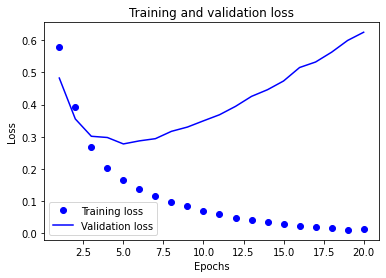

In [37]:
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 훈련과 검증 정확도 그리기

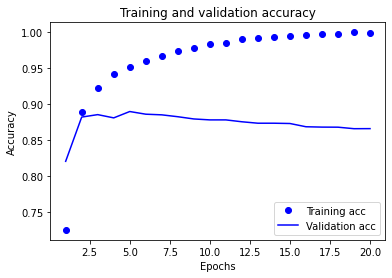

In [40]:
plt.clf() # 그래프 초기화
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

*그래프를 보면 **Overfitting**이 발생했다*<br><br>

두 번째 epoch 이후부터 훈련 데이터에 과도하게 최적화되어 훈련 데이터셋 이외의 데이터에는 일반화할 수 없다.<br><br>
이러한 경우 과대적합을 방지하기 위해서 세 번째 epoch 이후에 훈련을 중지할 수 있다.
<br><br>
모델을 다시 훈련시켜보자.

In [41]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 22ms/step - loss: 0.5493 - accuracy: 0.7400
Epoch 2/4
49/49 [==============================] - 1s 22ms/step - loss: 0.2767 - accuracy: 0.9074
Epoch 3/4
49/49 [==============================] - 1s 22ms/step - loss: 0.2001 - accuracy: 0.9331
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2964 - accuracy: 0.8812


In [42]:
results

[0.2963648736476898, 0.8811600208282471]

아주 단순한 방식으로 약 88퍼센트의 정확도에 달성했다!

### 훈련된 모델로 새로운 데이터에 대해 예측하기

In [44]:
model.predict(x_test)

array([[0.16621801],
       [0.9996514 ],
       [0.7737119 ],
       ...,
       [0.09562901],
       [0.06620824],
       [0.55519927]], dtype=float32)

어떤 샘플에 대해서는 0.99 이상이나 0.01 이하를 보이지만 어떤 샘플에 대해서는 확신이 없는 모델이다. 